In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import pylab
import numpy as np
# Рисуем графики не создавая новых окон
%matplotlib inline

In [2]:
import random
def generateSimpleBollobasRiordanGraph(n):
    G = nx.MultiDiGraph()
    G.add_node(0)
    G.add_edge(0, 0)
    # список всех вершин графа, каждая из них входит в него в количестве, равном её степени
    repeated_nodes = [0]
    while G.number_of_nodes() < n:
        new_node = G.number_of_nodes()
        G.add_node(new_node)
        # для возможности петли
        repeated_nodes.append(new_node)
        # выбираем конец ребра пропорционально степени вершины
        destination = random.choice(repeated_nodes)
        repeated_nodes.append(destination)
        G.add_edge(new_node, destination)
    return G

In [3]:
def generateBollobasRiordanGraph(n, m):
    G1mn = generateSimpleBollobasRiordanGraph(m * n)
    G = nx.MultiDiGraph()
    # объединяем вершины в последовательные группы по m: {0,...,m-1}, {m, ..., 2m-1}, ..., {m(n-1), ..., mn - 1}
    for u, v in G1mn.edges():
        u_new, v_new = u / m, v / m
        G.add_edge(u_new, v_new)
    return G

#### Задача 2
При каждом $n=100, 200, \ldots, 10000$ сгенерируйте граф $G_3^n$ в модели Боллобаша-Риордана и найдите в нем число треугольников (т. е. подграфов вида $a\to b,$ $a\to c,$ $b\to c$). Соотнесите полученные результаты с оценкой из теоремы Рябченко-Самосвата.

In [135]:
from itertools import permutations
# число треугольников в вершине v
def triangles_in_vertex(G, v):
    res = 0
    for u, w in permutations(G.neighbors(v), 2):
        if len({u, v, w}) == 3:
            res += G.number_of_edges(v, u) * G.number_of_edges(v, w) * G.number_of_edges(u, w)
    return res

# число треугольников в графе
def get_triangles_count(G):
    res = 0
    for v in G.nodes():
        res += triangles_in_vertex(G, v)
    return res

In [148]:
import numpy as np
triangles = []
ns = []
m = 3

for n in xrange(100, 10001, 100):
    G = generateBollobasRiordanGraph(n, m)
    triangles_count = get_triangles_count(G)
    triangles.append(triangles_count)
    ns.append(n)

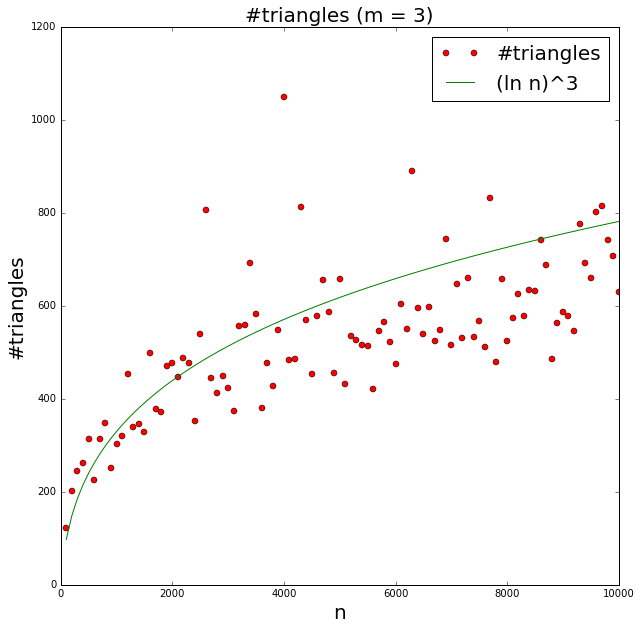

In [158]:
pylab.rcParams['figure.figsize'] = 10, 10
plt.plot(ns, triangles, color='r', ls='None', marker='o', label="#triangles")
plt.plot(ns, [np.log(n)**3 for n in ns], color='g', label="(ln n)^3")
plt.title("#triangles (m = 3)", fontsize=20)
plt.ylabel("#triangles", fontsize=20)
plt.xlabel("n", fontsize=20)
plt.legend(fontsize=20)
plt.show()